Erfan Panjehshahi-402243046

In [2]:
import numpy as np
import matplotlib.pyplot as plt

###Problem 1:
برای حل این سوال ابتدا سیگنال داده شده را به صورت آرایه در نظر میگیریم، در ادامه برای متفارن شدن آن در رسم بخش‌های زوج و فرد، آرایه دیگری را تحت عنوان محور ایکس در نظر میگیریم و در پلات کردن از آن استفاده میکنیم. بخش‌های زوج و فرد هم بر اساس رابطه ریاضی موجود حاصل میشوند.

In [3]:
signal = np.array([-3, 4, 3, 1, 5, -3, 2, -1, 2])

Even part of the signal

In [4]:
rev_signal = signal[::-1]
even_part = (signal + rev_signal) * 0.5

<StemContainer object of 3 artists>

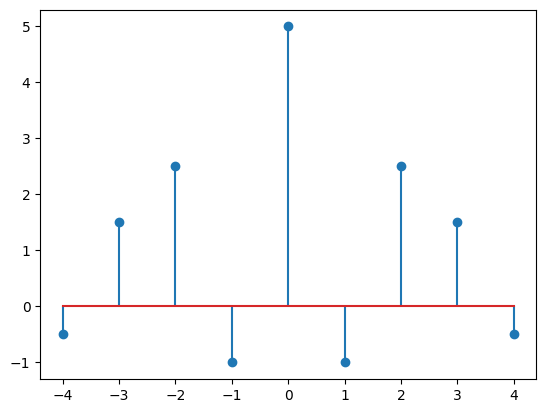

In [5]:
# ploting even part:
x_axis = np.array([-4, -3, -2, -1, 0 , 1, 2, 3, 4])
plt.stem(x_axis, even_part)

Odd part of the signal

<StemContainer object of 3 artists>

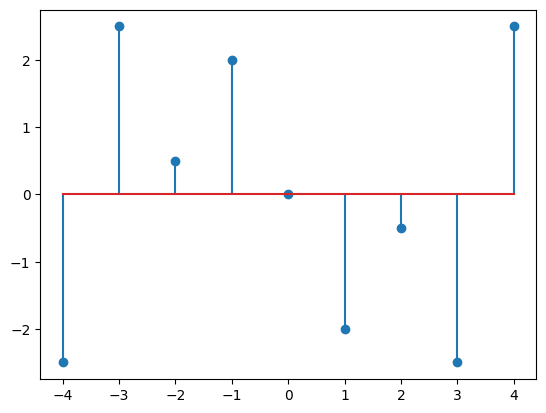

In [6]:
odd_part = (signal - rev_signal) * 0.5
plt.stem(x_axis, odd_part)

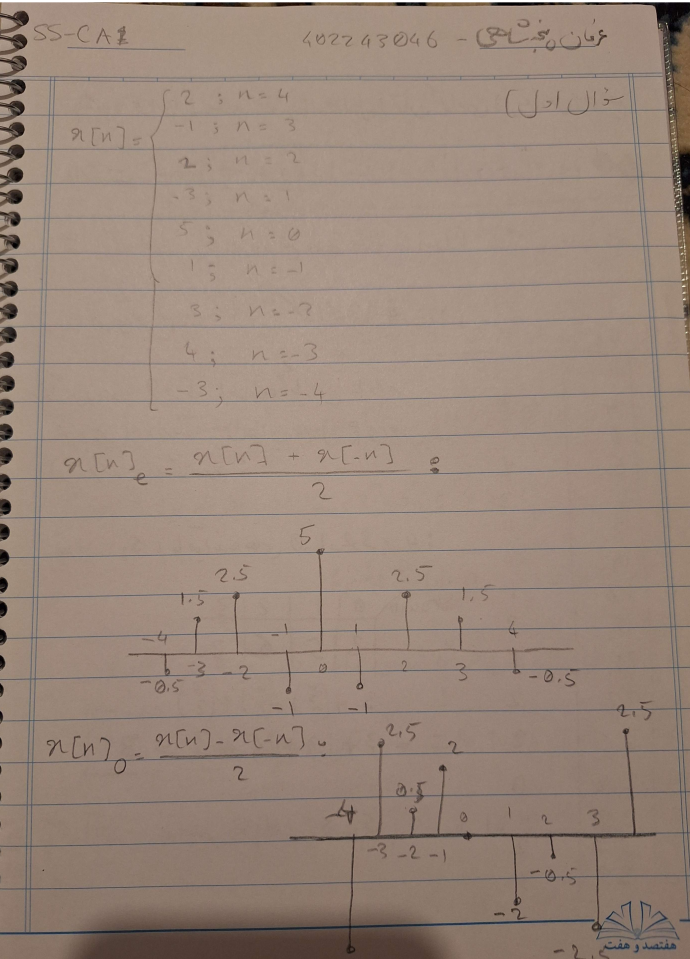

###Problem 2:
برای حل این سوال،ابتدا سیگنال‌ها را تعریف میکنیم. در ادامه برای هر سیگنال طبق صورت سوال دامنه را تعریف میکنیم و با استفاده کردن از نامپای، میتوانم سیگنال مورد نظر سوال را در یک آرایه داشته باشیم. در انتها با استفاده از تابع پایین میتوانیم نمودار‌های خواسته شده را رسم کنیم.

In [7]:
# this function is used for plotting:
def plot_mag(domain, magnitude, phase):
  plt.figure(figsize=(10, 6))
  plt.subplot(2, 1, 1)
  plt.plot(domain, magnitude)
  plt.title('Magnitude')
  plt.xlabel('t')
  plt.ylabel('Magnitude')

  plt.subplot(2, 1, 2)
  plt.plot(domain, phase)
  plt.title('Phase')
  plt.xlabel('t')
  plt.ylabel('Phase')

  plt.tight_layout()
  plt.show()

In [8]:
# Define signal and its domain
t = np.linspace(-10, 10, 500)
x1 = f_t = np.exp(-t) * np.sin(t) * np.exp(1j * (np.pi / 2) * t)
dx_dt = np.gradient(f_t, t)

In [10]:
# use built-in functions of numpy to find magnitude and angle of signals
magnitude = np.abs(dx_dt)
phase = np.angle(dx_dt)

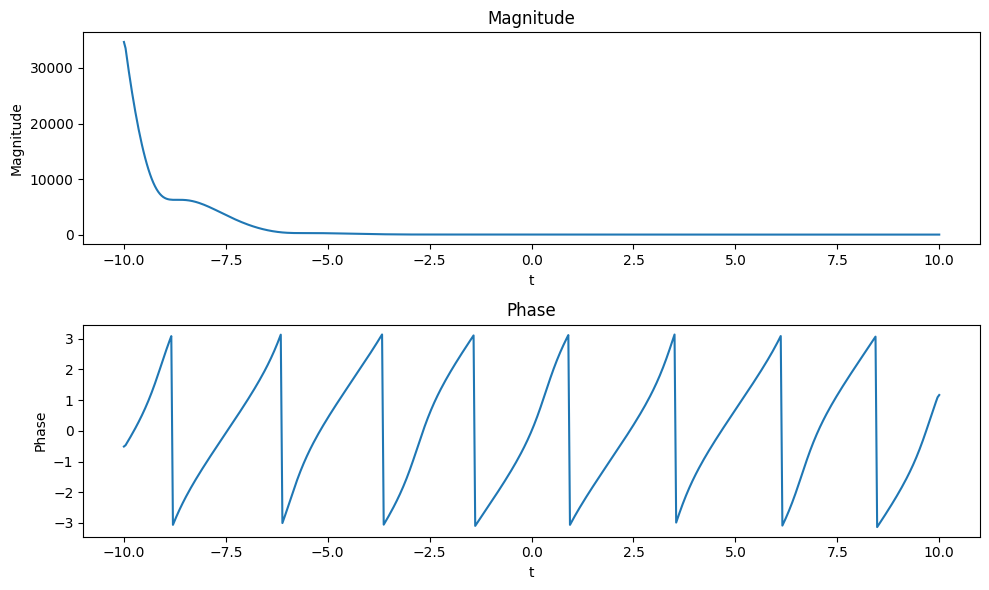

In [11]:
plot_mag(t, magnitude, phase)

Second part

In [12]:
t2 = np.linspace(-15, 15, 500)
x_2 = np.convolve(np.power(t2, 3), t2, mode='same') * np.exp(1j * t2)

In [13]:
mag2 = np.abs(x_2)
phase2 = np.angle(x_2)

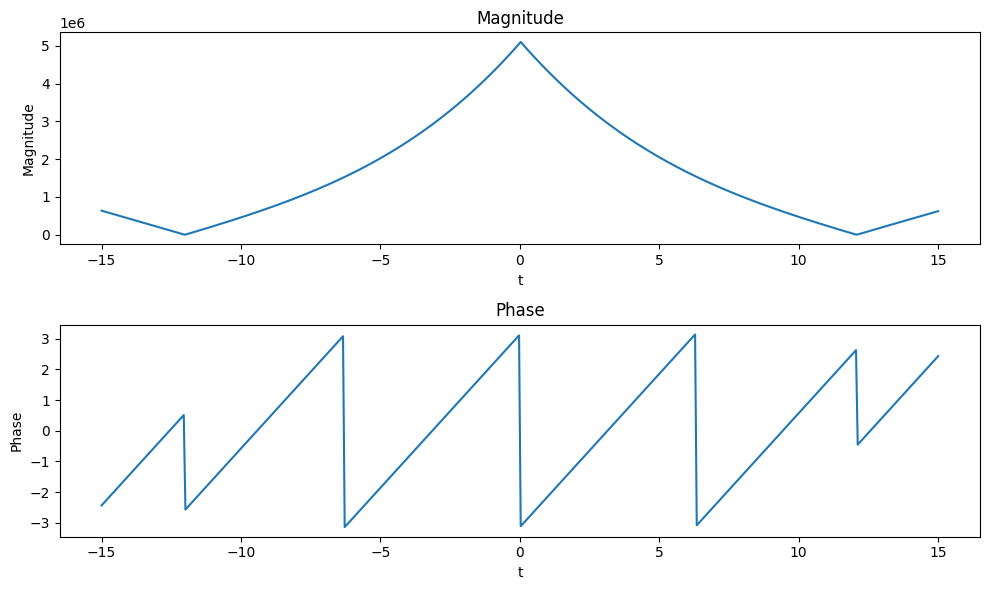

In [14]:
plot_mag(t2, mag2, phase2)

Third part

In [15]:
t3= np.linspace(-5 * np.pi, 5*np.pi, 500)
x_3 = np.power(2, (np.log((1j + np.pi) / (-1j*np.pi*np.power(t3, 8)+8)) / np.log(8)))

In [16]:
mag3 = np.abs(x_3)
phase3 = np.angle(x_3)

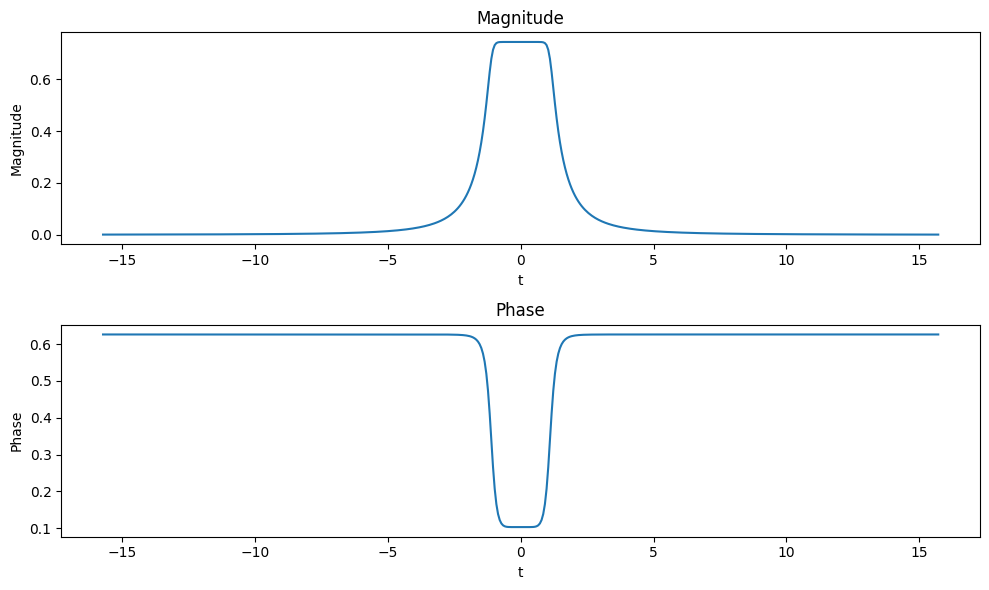

In [17]:
plot_mag(t3, mag3, phase3)

Forth part

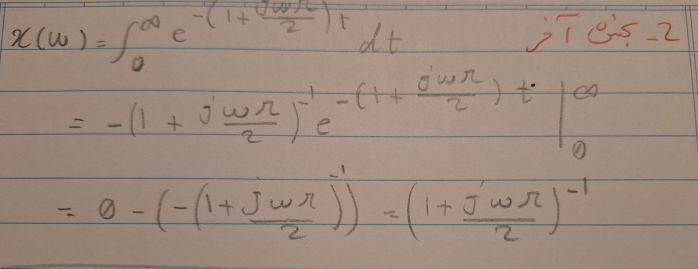

In [18]:
t4 = np.linspace(-10*np.pi, 10*np.pi, 500)
x_4 = 1 / (1 + (1J * t4 * np.pi) / 2)

In [19]:
mag4 = np.abs(x_4)
phase4 = np.angle(x_4)

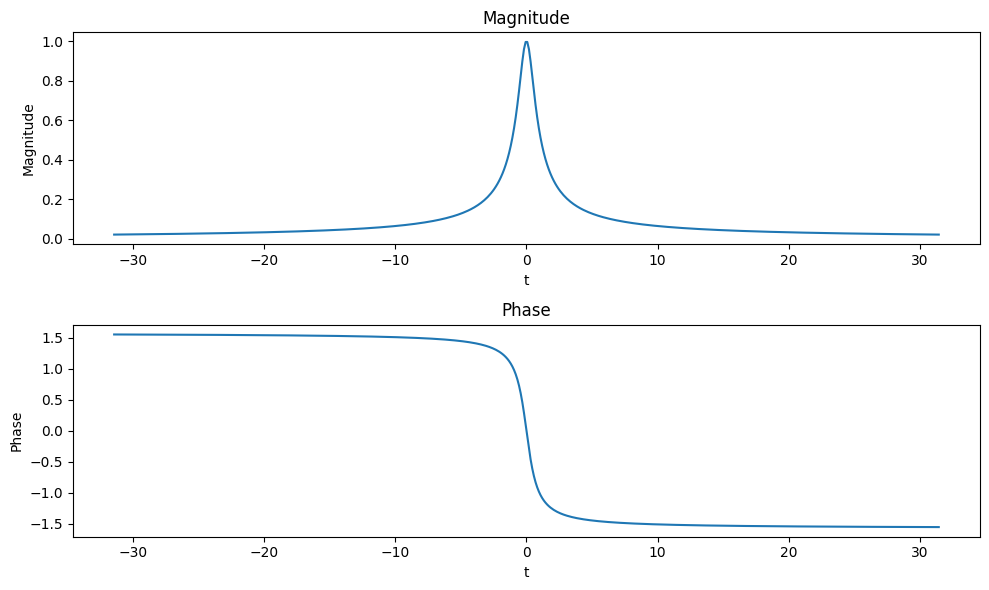

In [20]:
plot_mag(t4, mag4, phase4)

###Problem 3:
برای حل این سوال ابتدا توابع داده شده را کد میزنیم و سپس پلات میکنیم، برای کانوالو کردن هم از تابع آماده کتابخانه نامپای استفاده میکنیم

In [21]:
# define domain:
t = np.linspace(-20, 20, 500)
def ft (t):
  if np.abs(t) <= np.pi:
    return np.abs(np.sin(t))
  elif (np.abs(t) > np.pi and np.abs(t) <= 2*np.pi):
    return np.power(np.abs(t) - np.pi, 2)
  elif (np.abs(t) > 2*np.pi and np.abs(t) <= 3*np.pi):
    return -1*np.abs(t) + np.pi ** 2 + 2*np.pi
  else:
    return np.pi ** 2 - np.pi

signal = np.array([ft(i) for i in t])

**Part a**

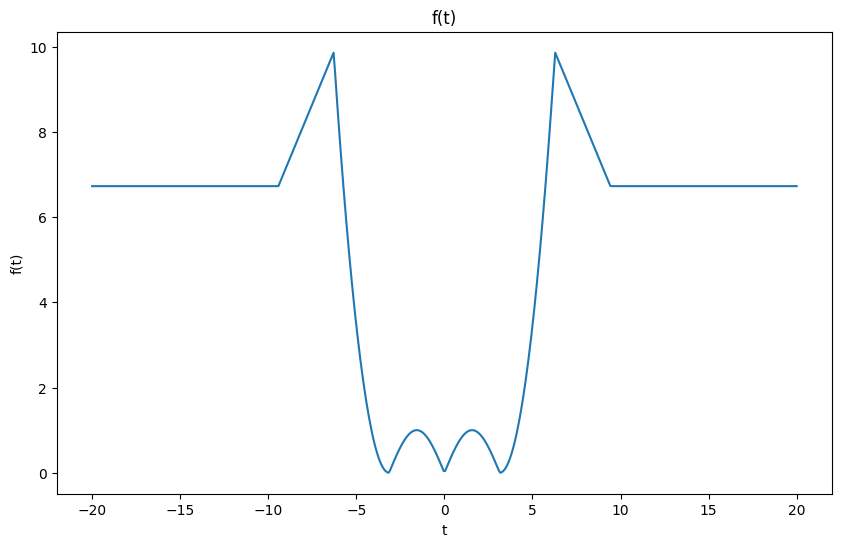

In [22]:
# plot ft:
plt.figure(figsize=(10, 6))
plt.plot(t, signal)
plt.title('f(t)')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

**Part b**

In [23]:
# plotting 1D Reverse Edge Detection
def RED(t):
  if t < 0:
    return -1
  elif t == 0:
    return 0
  else:
    return 1

RED = np.array([RED(i) for i in t])

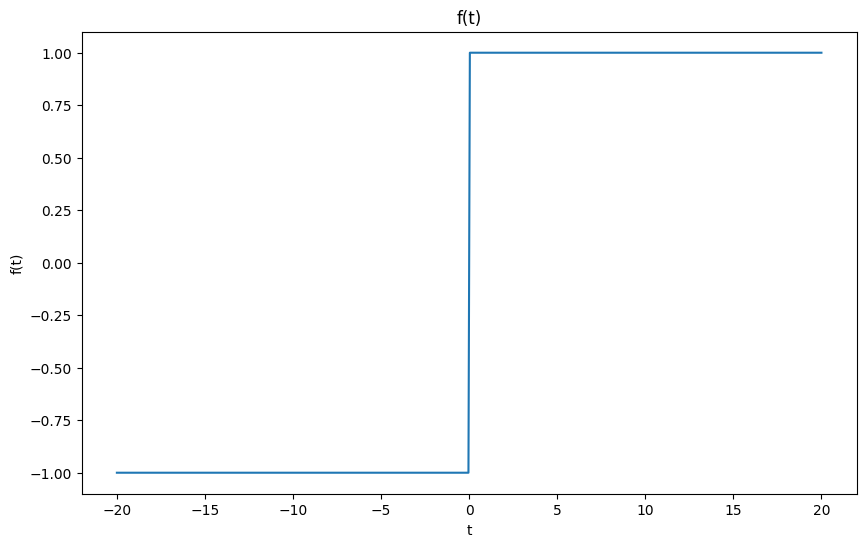

In [24]:
# plot RED:
plt.figure(figsize=(10, 6))
plt.plot(t, RED)
plt.title('f(t)')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.show()

**Part c**

In [25]:
# Now convolve these two signals and plot the result
convolution_result = np.convolve(RED, signal, mode='same')

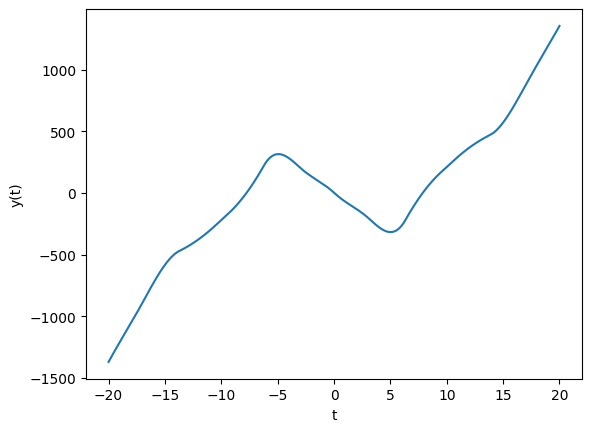

In [26]:
plt.figure(figure=(10, 6))
plt.plot(t, convolution_result)
plt.ylabel('y(t)')
plt.xlabel('t')
plt.show()

###Problem 4
ابتدا یکی از آرایه‌ها را معکوس میکنیم و سپس آن را از روی آرایه دیگر عبور میدهیم و در هر مرحله جمع ضرب‌های عضو متناظری که روی هم میافتند را محاسبه کرده و در لیست خروجی ذخیره میکنیم. این عملیات به سه مرحله پیش از هم پوشانی کامل، در زمان پوشش آرایه کوچک توسط آرایه بزرگ و در هنگام اتمام این پوشش تقسیم میکنیم

**Part a**

In [27]:
def conv(arr1, arr2):
  conv_result = list()
  rev_arr1 = arr1[::-1]
  # before full overlap
  for i in range(len(arr1)):
    conv_result.append(np.sum([rev_arr1[len(arr1) - j - 1] * arr2[i - j] for j in range(i + 1)]))
  # full overlap
  for i in range(1,np.abs(len(arr2) - len(arr1))+1):
    conv_result.append(np.sum([rev_arr1[j] * arr2[j + i] for j in range(len(arr1))]))
  # after full overlap (reducing overlap)
  for i in range(1, len(arr1)):
        conv_result.append(np.sum([rev_arr1[j] * arr2[len(arr2) - len(arr1) + j + i] for j in range(len(arr1) - i)]))
  return np.array(conv_result)

example =conv([12,24,1,7,9,31,13], [5, 17, 19,3,21,8,6,35,29,41])
example

array([  60,  324,  641,  544,  507, 1044, 1069, 1556, 1779, 2027, 1833,
        849, 1711, 1723, 1648,  533])

**Part b**

In [28]:
# test result
built_in = np.convolve(np.array([12,24,1,7,9,31,13]), np.array([5, 17, 19,3,21,8,6,35,29,41]))
built_in

array([  60,  324,  641,  544,  507, 1044, 1069, 1556, 1779, 2027, 1833,
        849, 1711, 1723, 1648,  533])

###Problem 5

**Part a**

In [29]:
# create a domain
d = np.linspace(-10, 10, 21)

def step(t):
  if t < 0:
    return 0
  elif t == 0:
    return 0
  else:
    return 1

def pulse(t):
  if t == 0:
    return 1
  else:
    return 0

step_signal = np.array([step(i) for i in d])
pulse_signal = np.array([pulse(i) for i in d])


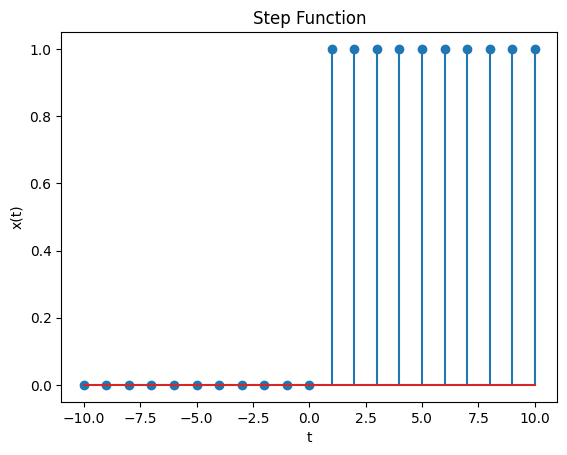

In [30]:
# Plotting
plt.figure(figure=(10, 6))
plt.stem(d, step_signal)
plt.title('Step Function')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()



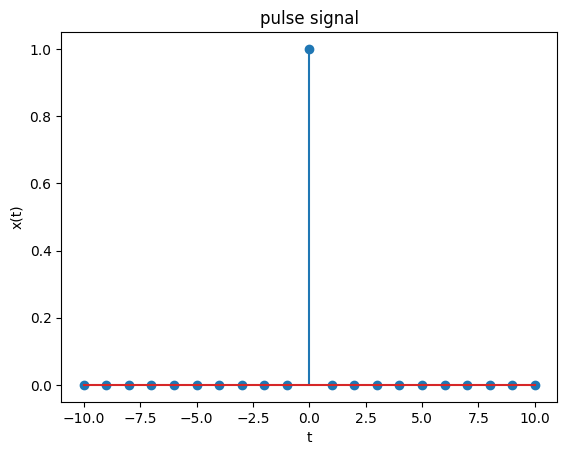

In [31]:
plt.figure(figure=(10, 6))
plt.stem(d, pulse_signal)
plt.title('pulse signal')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.show()

**Part b**

In [32]:
# use function f(t) from problem 3
function = np.array([ft(i) for i in d])

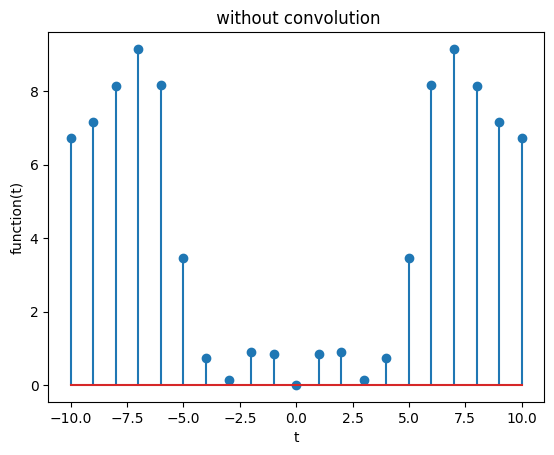

In [33]:
# plot this function before convolving with pulse function:
plt.figure(figure=(10, 6))
plt.stem(d, function)
plt.title(' without convolution')
plt.xlabel('t')
plt.ylabel('function(t)')
plt.show()

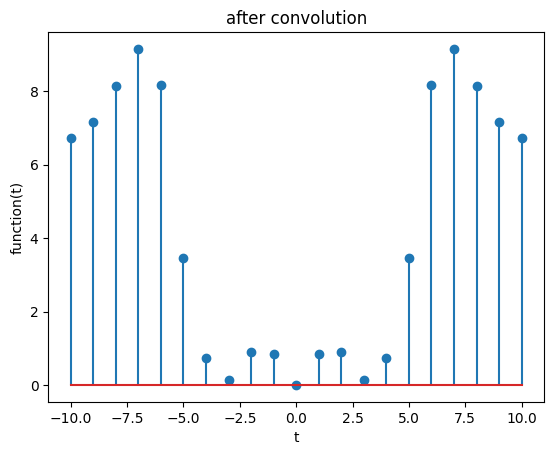

In [34]:
# convolve and plot again
convolution_with_pulse = np.convolve(pulse_signal, function, mode='same')
plt.figure(figure=(10, 6))
plt.stem(d, convolution_with_pulse)
plt.title('after convolution')
plt.xlabel('t')
plt.ylabel('function(t)')
plt.show()

با مقایسه دو شکل بالا میتوان دریافت که کانوالو کردن یک تابع یا سیگنال با تابع ضربه خود تابع اولیه را برمیگرداند و تابع ضربه عضو خنثی کانولووشن است.